Dantar Alejandro Ortiz Vega

Jose Ramon Preciado Torres

#Implementacion del Q-learning

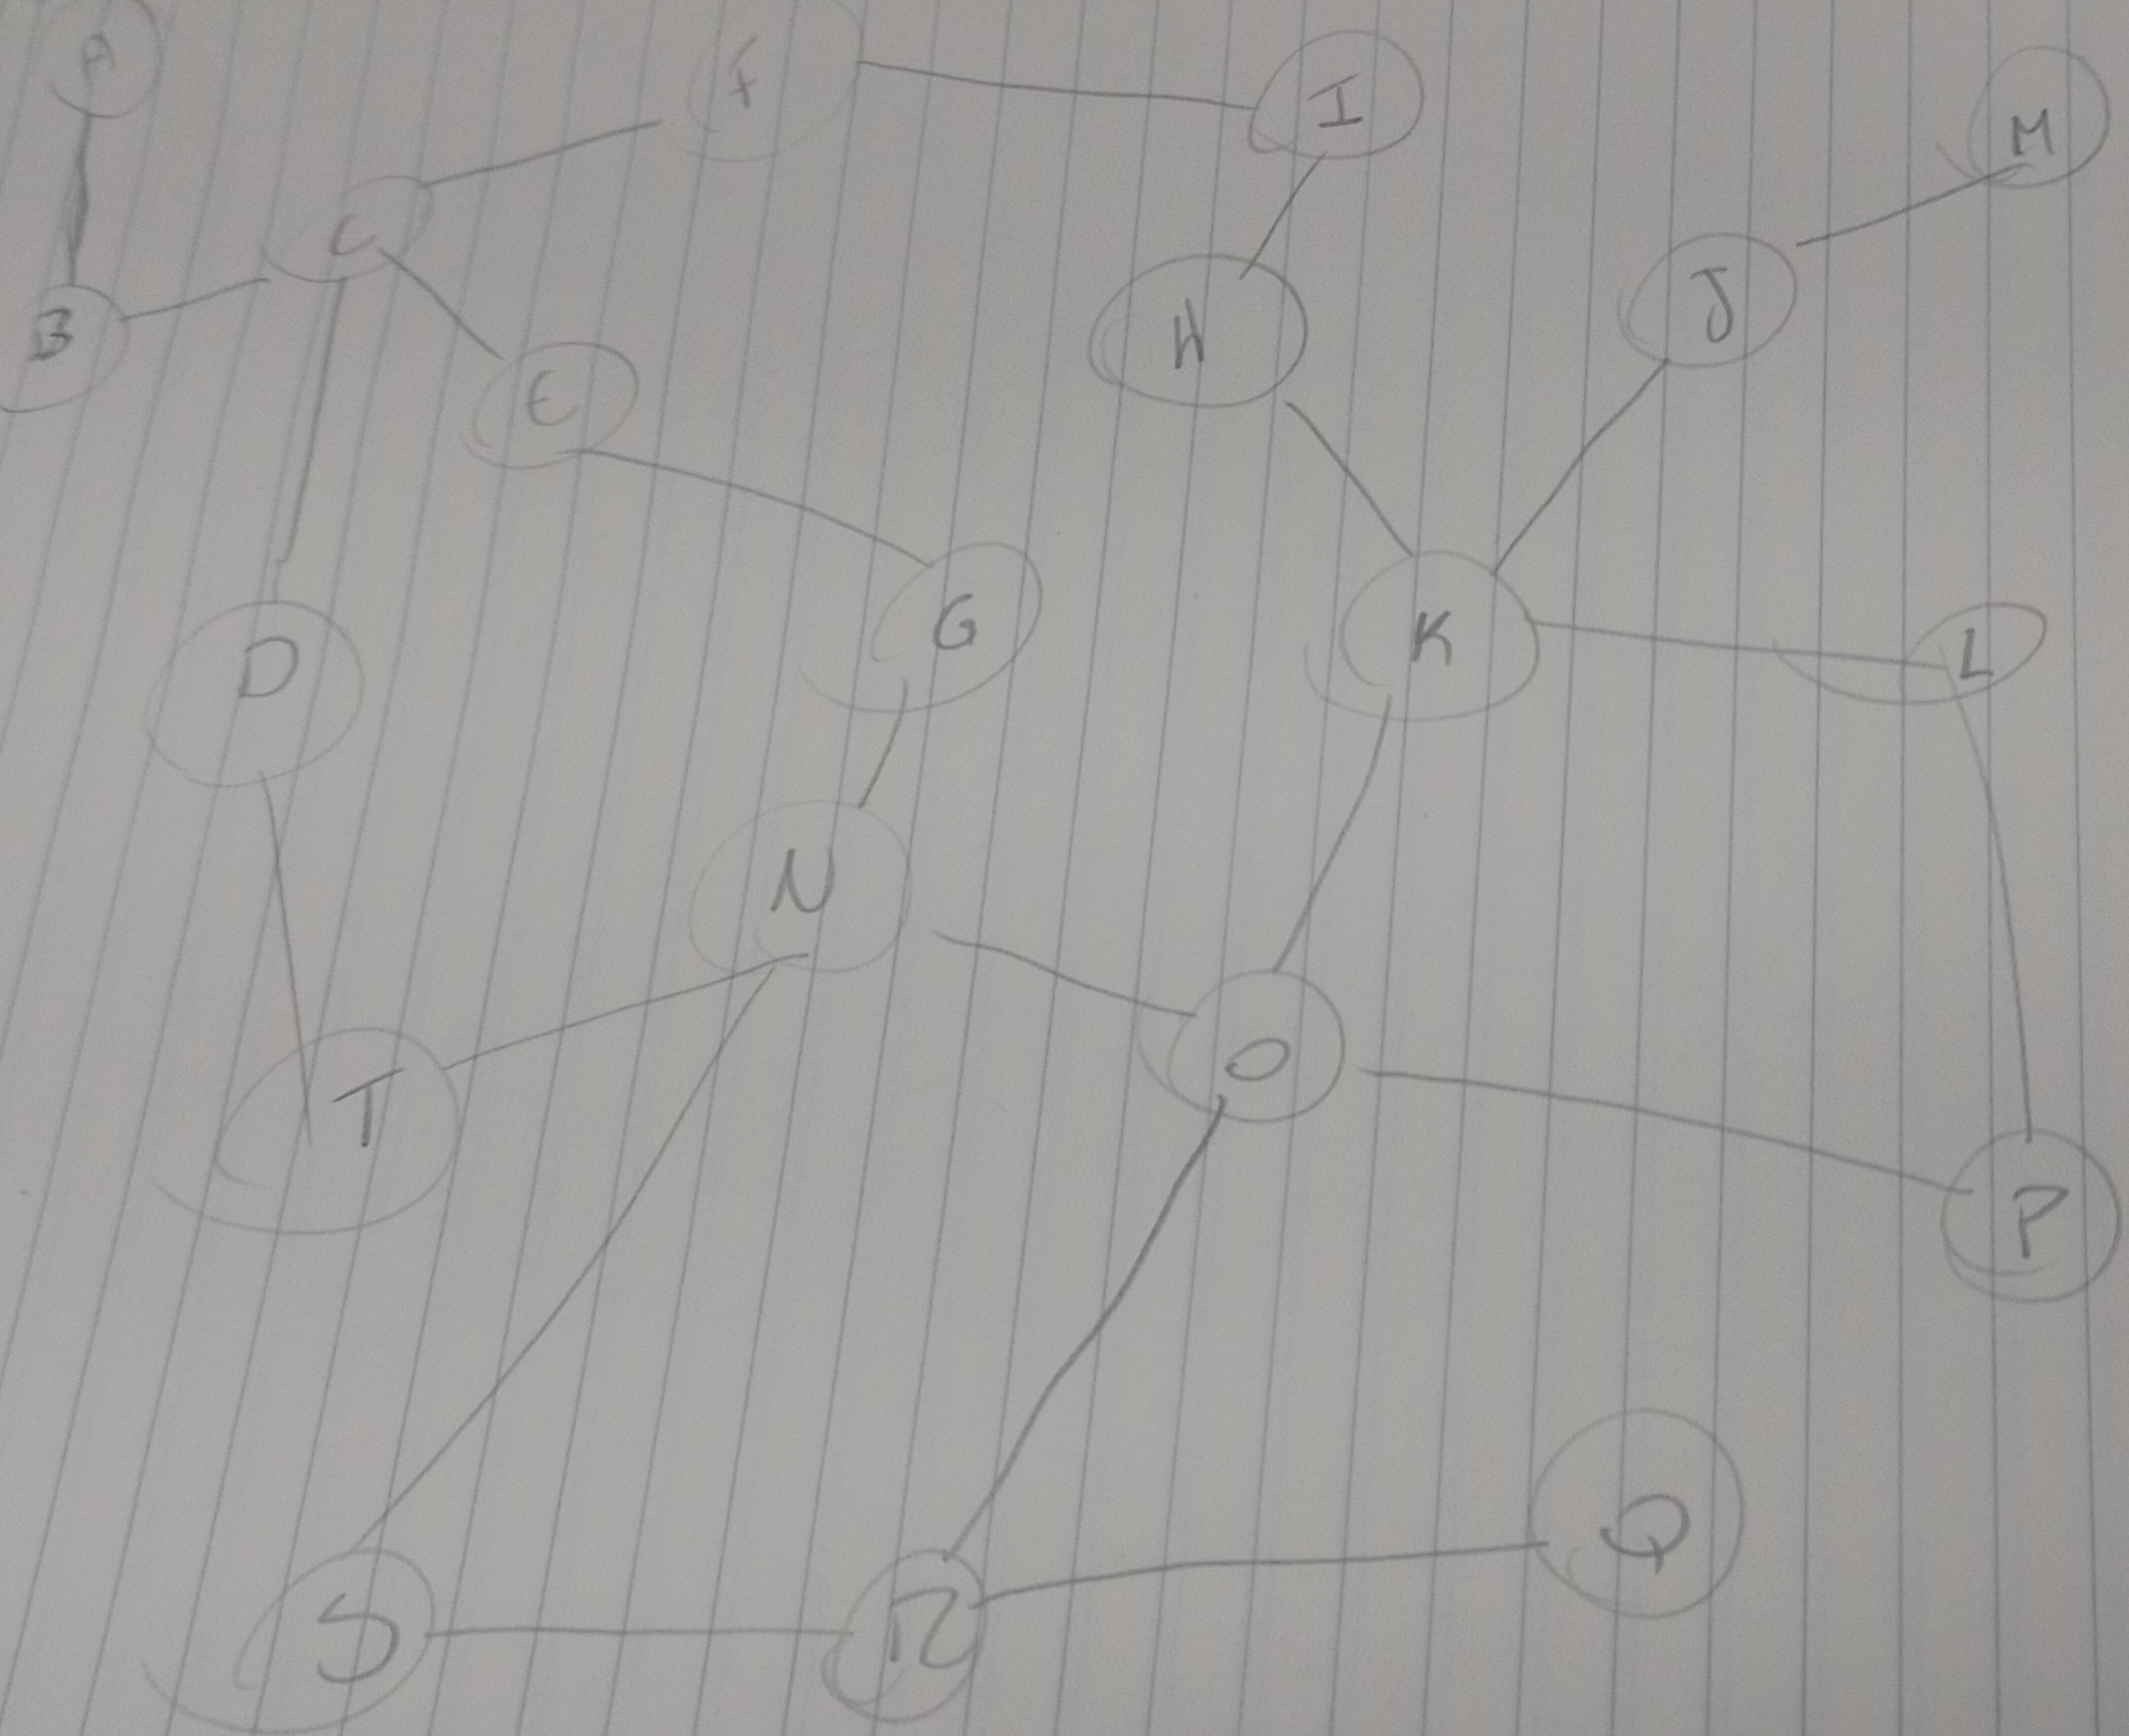

# EMPRESA TRANSPORTADORA DE CARGA

**Descripcion**

Una empresa de transporte de carga que opera en una region que abarca varias ciudades y areas rurales, recoge cargas de multiples proveedores ubicados en diferentes áreas y la entrega a una variedad de destinos finales, los cuales pueden incluir almacenes, centros comerciales, empresas industriales, puertos, etc.

El desafio es optimizar las rutas de los camiones para recolectar la carga de manera eficiente desdse los proveedores y entregarla a los destinos finales, minimizando la distancia recorrida, los tiempos de transito y los costos operativos asociados.

**Definicion de acciones**

Las acciones representaran los movimientos posibles que pueden realizar los camiones entre las diferentes ubicaciones, Estas acciones podrian incluir recolectar carga de un proveedor, dejar la carga en un destino final, moverse entre ubicaciones intermedias, etc.

0: Recoger en Depósito Central. <br>
1: Recoger en Almacén Principal. <br>
2: Recoger en Terminal de Carga. <br>
3: Recoger en Puerto de Entrega. <br>
4: Recoger en Punto de Recoleccion A. <br>
5: Entrega en Centro de Distribución. <br>
6: Entrega en Depósito Regional. <br>
7: Entrega en Área de Carga y Descarga. <br>
8: Entrega en Plaza de Abastecimiento. <br>
9: Entrega en Terminal de Envios. <br>
10: Moverse a Zona Industrial. <br>
11: Moverse a Distrito Comercial. <br>
12: Moverse a Puerto Maritimo. <br>
13: Moverse a Zona de Almacenamiento. <br>
14: Moverse a Destino Comercial. <br>
15: Moverse a Terminal Logística. <br>
16: Moverse a Área de Transferencia. <br>
17: Moverse a Terminal de Descanso. <br>
18: Moverse a Punto de Carga Rápida. <br>
19: Moverse a Área de Descarga. <br>

**Definicion de recompensas**

Esta matriz indicará las recompensas asociadas con cada transicion entre estados debido a una accion particular.
- Si el camion recolecta carga de manera eficiente de un proveedor, recompensa = 1
- Si el camion entrega la carga en un destino final, recompensa = 10
- Si el camion se mueve entre ubicaciones sin recolectar ni entregar carga, recompensa = 0
- Si el camion intenta moverse a una ubicacion no valida o realizar una acción no permitida, recompensa = -1

In [ ]:
import numpy as np

# Definición de los estados
def_de_estados = {'A': 0,
                  'B': 1,
                  'C': 2,
                  'D': 3,
                  'E': 4,
                  'F': 5,
                  'G': 6,
                  'H': 7,
                  'I': 8,
                  'J': 9,
                  'K': 10,
                  'L': 11,
                  'M': 12,
                  'N': 13,
                  'O': 14,
                  'P': 15,
                  'Q': 16,
                  'R': 17,
                  'S': 18,
                  'T': 19}
print(def_de_estados)


{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19}


In [ ]:
acciones = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
print(acciones)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


In [ ]:
# Matriz de recompensa (R)
matriz = np.array([
                   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1],
                   [0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 1, 0, 1000, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0],
                   [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0],
                   [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
                   ])

# Mostrar la matriz de recompensa
print("Matriz de recompensa (R): \n", matriz)

Matriz de recompensa (R): 
 [[   0    1    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   1    0    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    1    0    1    1    1    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    1]
 [   0    0    1    0    0    0    1    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    1    0    0    0    0    0    1    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    1    0    0    0    0    0    0    0    0    1
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    1    0    1    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    1    0    1    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0 

In [ ]:
# Configuración de los parámetros gamma y alfa para el Q-Learning
gamma = 0.95
alpha = 0.7
# Inicialización de los valores Q
Q = np.array(np.zeros([20,20]))

In [ ]:
# Implementación del proceso de Q-Learning
for i in range(1000):
    estado_actual = np.random.randint(0,20)
    accion_realizable = []
    for j in range(20):
        if matriz[estado_actual, j] > 0:
            accion_realizable.append(j)
    estado_siguiente = np.random.choice(accion_realizable)
    TD = matriz[estado_actual, estado_siguiente] + gamma*Q[estado_siguiente, np.argmax(Q[estado_siguiente,])]- Q[estado_actual, estado_siguiente]
    Q[estado_actual, estado_siguiente] = Q[estado_actual, estado_siguiente] + alpha*TD

In [ ]:
print("Q-Values:")
print(Q.astype(int))

Q-Values:
[[   0  387    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [ 286    0  515    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0  383    0  488  488  695    0    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0  511    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0  651]
 [   0    0  520    0    0    0  650    0    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0  502    0    0    0    0    0  927    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0  484    0    0    0    0    0    0    0    0  866
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0  933    0 1662    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0  687    0 1246    0    0    0    0    0    0
     0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    

**Tarea 2**

1. Comente el programa completo y de una descripción del problema resuelto con el método de Q-Learning. Se debe entender el algoritmo de Q-Learning haciendo un diagrama de flujo básico
2. Para tener un algoritmo funcional, cómo debería configurar la matriz de recompensas para ir por una ruta óptima por ejemplo desde E a G.
3. Pruebe con diferentes valores de gamma y alpha y comente los resultados obtenidos.
4. Como obtener una ruta que obligue a pasar por una ruta intermedia ?.
5. Comente como funciona np.argmax(Q[estado_inicial,]), que esta devolviendo en cada ejecución.
6. Construir igualmente un archivo .ipynb con la versión desarrollada por cada uno de Uds., asignarle valores a la matriz de recompensas de acuerdo a rutas que Uds., establecieron y comentar los resultados.
7. El reporte final se debe subir al classroom de la materia

Basicamente en el codigo de la implementacion Q-learning lo que se hace es que en el rango que es de 1000
o el numero que quieras,variara eso si,del estado actual que es A se aleatoriza por asi decirlo en la matriz de 20x20 en el que en un rango de 0-20 que son los estados se agregara la accion realizable,para esto se va al estado siguiente y asi sucesivamente con el valor de gamma y alpha, y bueno a grandes rasgos np.argmax es que selecciona un estado inicial aleatoriamente,y crea una lista de las acciones posibles desde el estado actual basandose en la matriz se elige la accion aleatoriamentee actualiza el valor Q para el par estado-acción actual basado en el TD error calculado.
La clave aquí es que np.argmax selecciona la mejor acción posible desde el estado siguiente según la tabla Q actual lo que permite que el algoritmo aprenda a maximizar las recompensas futuras basándose en el conocimiento actual